<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="50" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** <span style="color:NAVY"> Andrés Lares Barragán</span>

**Fecha:** 17 de febrero del 2021.  

**Expediente** : <span style="color:NAVY"> 724055 </span>  
    
**Profesor:** Oscar David Jaramillo Zuluaga.

<span style="color:NAVY"> Estudiante 1</span>

# Tarea 5: Clase 9
    
### Link a repositorio GitHub
   

> Para las siguiente dos funciones, genere muestras aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.


In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

## Pregunta 1
> Generación variable aleatoria **continua**
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

<span style="color:NAVY"> 1. Conociendo la distribución de probabilidad acumulada (CDF), el método de la transformada inversa implica igualar $F(x)$ a una variable aleatoria con distribución uniforme $U$.   
2. Posteriormente, se despeja $x$ para encontrar la función $F^{-1}(U)$ que genera valores aleatorios de $x$ con distribución de probabilidad (PDF) $f(x)$. </span>

#### <span style="color:NAVY"> Transformada Inversa
$$F^{-1}(U) = \sin^2{\frac{\pi U}{2}} \quad \small{U \rightarrow \text{V.A.} \sim \text{uniforme(0,1)}}$$

$$F^{-1}(U) = \frac{1-\cos{\pi U}}{2}$$
</span>

In [3]:
def T_inv(N):
    '''
    Genera muestras aleatorias con dist f(x)
    de acuerdo al metodo de la transformada inversa.
    '''
    return (1-np.cos(np.pi*np.random.random(N)))/2

#### <span style="color:NAVY">Comprobación  
El histograma de los valores generados debe ser acostado por la PDF $f(x)$.
    
$$f(x) = \frac{dF}{dx} = \frac{1}{\pi \sqrt{x} \sqrt{1-x}} $$
</span>

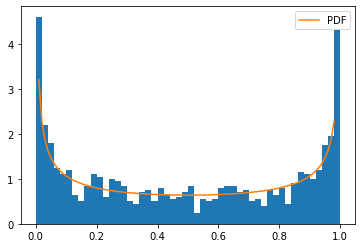

In [4]:
# Comprobar histograma de valores generados vs. funcion PDF
n = 1000 
generados = T_inv(n)

x = np.arange(0.01, .99, 0.01) # valores desde 0.01 hasta 0.99 para evitar dividir entre cero.
f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

plt.hist(generados, bins = 50, density = True)
plt.plot(x,f(x),label='PDF')
plt.legend()
plt.show()

## Pregunta 2

> Generación variable aleatoria **discreta**
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

<span style="color:NAVY"> 
PMF
$$P(X=i) = p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$  
CDF 
$$\operatorname {P} (X\leq x) = \sum _{x_{i}\leq x}p(x_{i})$$
</span>

In [101]:
# Funcion que calcula la probabilidad de ocurrencia de tener 'x' éxitos.
PMF = lambda n, p, N: pd.Series(np.random.binomial(n,p,N)).value_counts(normalize = True)
prob_ocur = PMF(10,.7,10000) 
prob_ocur # esta ordenada de mayor a menor segun el valor de p. NO nos sirve asi para calcular p_acum
prob_ocur

7     0.2727
8     0.2342
6     0.1943
9     0.1173
5     0.1042
4     0.0378
10    0.0308
3     0.0076
2     0.0010
1     0.0001
dtype: float64

In [124]:
# Ordenar prob_ocur de manera ascendente segun el valor de x. (1,2,3,..,10)
p_ocur_ordenadas = [[prob_ocur.iloc[i] for i in range(0,len(prob_ocur)) if prob_ocur.index[i] == j]
                    for j in prob_ocur.index.sort_values()]

# crear un data frame con las probabilidades de ocrruencia en orden ascendente segun el valor de x.
data = pd.DataFrame(index = prob_ocur.index.sort_values(), data = p_ocur_ordenadas, columns = ['$$P(X=i)$$']).rename_axis(index='$$X_i$$')

# agregar la probabilidad acumulada usando np.cumsum()
data['$$\operatorname {P} (X\leq x) $$'] = np.cumsum(p_ocur_ordenadas)
data

,$$P(X=i)$$,$$\operatorname {P} (X\leq x) $$
$$X_i$$,,
1,0.0001,0.0001
2,0.0010,0.0011
3,0.0076,0.0087
4,0.0378,0.0465
5,0.1042,0.1507
6,0.1943,0.3450
7,0.2727,0.6177
8,0.2342,0.8519
9,0.1173,0.9692
